## Assignment 5.1

In [4]:
from keras import models
from keras import layers

Loading the IMDB dataset

In [5]:
from keras.datasets import imdb

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here’s how you can quickly decode one of these reviews back to English words:

In [10]:
word_index = imdb.get_word_index()                                    
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])            
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 

1654784/1641221 [==============================] - 0s 0us/step


Encoding the integer sequences into a binary matrix

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)   

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now the data is ready to be fed into a neural network.

The model definition

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Configuring the optimizer

In [18]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Using custom losses and metrics

In [19]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Setting aside a validation set

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 16s 60ms/step - loss: 0.6064 - acc: 0.7128 - val_loss: 0.4087 - val_acc: 0.8721
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3463 - acc: 0.9009 - val_loss: 0.3209 - val_acc: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2475 - acc: 0.9248 - val_loss: 0.2817 - val_acc: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1843 - acc: 0.9431 - val_loss: 0.2933 - val_acc: 0.8801
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1530 - acc: 0.9505 - val_loss: 0.2795 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1215 - acc: 0.9647 - val_loss: 0.3107 - val_acc: 0.8782
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1006 - acc: 0.9685 - val_loss: 0.3104 - val_acc: 0.8850
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0835 - 

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Plotting the training and validation loss

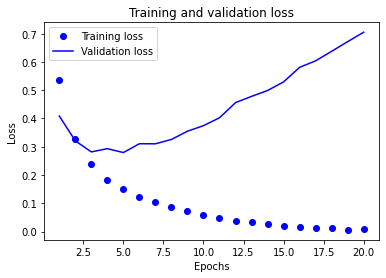

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

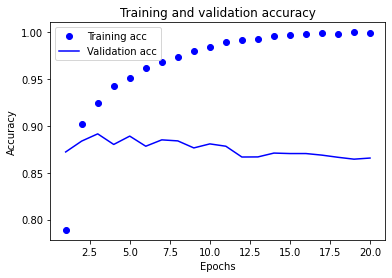

In [24]:
plt.clf()                                      
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Retraining a model from scratch

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.5601 - accuracy: 0.7639
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2835 - accuracy: 0.9083
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1989 - accuracy: 0.9317
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3099 - accuracy: 0.8784


USING A TRAINED NETWORK TO GENERATE PREDICTIONS ON NEW DATA

In [26]:
model.predict(x_test)

array([[0.22002155],
       [0.9996809 ],
       [0.9457886 ],
       ...,
       [0.17937511],
       [0.13360816],
       [0.78052926]], dtype=float32)

## Assignment 5.2

Loading the Reuters dataset

In [27]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [29]:
len(train_data)


8982

In [30]:
len(test_data)

2246

In [31]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Decoding newswires back to text

In [32]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])     

565248/550378 [==============================] - 0s 0us/step


In [33]:
train_labels[10]

3

PREPARING THE DATA

In [34]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)              


Vectorized training data and test data

In [35]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels)   

One-hot encoding / Categorical encoding

In [36]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

BUILDING YOUR NETWORK
Model definition

In [37]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compiling the model

In [38]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

VALIDATING YOUR APPROACH
Setting aside a validation set

In [39]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training the model

In [40]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 54ms/step - loss: 3.0169 - accuracy: 0.4364 - val_loss: 1.6953 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 1.4741 - accuracy: 0.6852 - val_loss: 1.3124 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.0467 - accuracy: 0.7676 - val_loss: 1.1612 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8252 - accuracy: 0.8217 - val_loss: 1.0567 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 1s 37ms/step - loss: 0.6746 - accuracy: 0.8622 - val_loss: 0.9703 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.5336 - accuracy: 0.8883 - val_loss: 0.9454 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.4217 - accuracy: 0.9141 - val_loss: 0.9170 - val_accuracy: 0.8070
Epoch 8/20
16

Plotting the training and validation loss

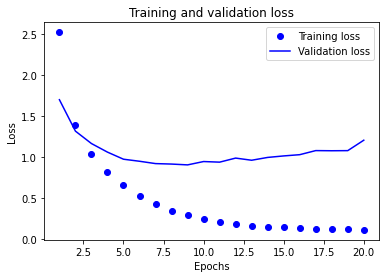

In [41]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

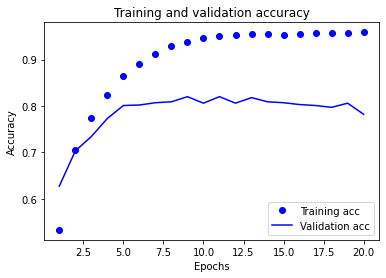

In [57]:
plt.clf()                                      
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# acc = history.history['acc']
# val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Retraining a model from scratch

In [50]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 59ms/step - loss: 3.2298 - accuracy: 0.4070 - val_loss: 1.7181 - val_accuracy: 0.6400
Epoch 2/9
16/16 [==============================] - 1s 36ms/step - loss: 1.4850 - accuracy: 0.6901 - val_loss: 1.2885 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 1s 36ms/step - loss: 1.0689 - accuracy: 0.7729 - val_loss: 1.1334 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 37ms/step - loss: 0.8392 - accuracy: 0.8222 - val_loss: 1.0322 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 37ms/step - loss: 0.6815 - accuracy: 0.8596 - val_loss: 0.9800 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 1s 35ms/step - loss: 0.5318 - accuracy: 0.8924 - val_loss: 0.9258 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 0.4417 - accuracy: 0.9041 - val_loss: 0.9049 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [51]:
results

[0.9826157093048096, 0.7853962779045105]

GENERATING PREDICTIONS ON NEW DATA

In [52]:
predictions = model.predict(x_test)


In [53]:
predictions[0].shape

(46,)

In [54]:
np.sum(predictions[0])

1.0000001

In [55]:
np.argmax(predictions[0])

3

## Assignment 5.3

Loading the Boston housing dataset

In [58]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [59]:
train_data.shape

(404, 13)

In [60]:
test_data.shape

(102, 13)

In [61]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

PREPARING THE DATA
Normalizing the data

In [63]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

 Model definition

In [64]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()                                  
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

K-fold validation

In [65]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    model.fit(partial_train_data, partial_train_targets,                     
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)      
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [66]:
all_scores

[2.3133180141448975, 2.34952712059021, 3.068028450012207, 2.5455784797668457]

In [67]:
np.mean(all_scores)

2.56911301612854

200 epochs.   Saving the validation logs at each fold

In [70]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    history = model.fit(partial_train_data, partial_train_targets,           
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Building the history of successive mean K-fold validation scores

In [72]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

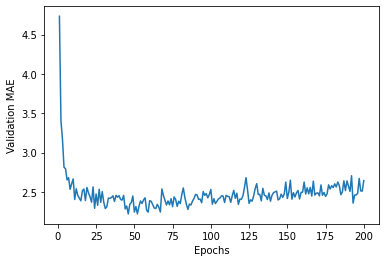

In [73]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Plotting validation scores, excluding the first 10 data points

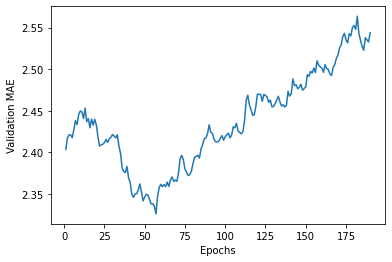

In [74]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Training the final model

In [75]:
model = build_model()                                                     
model.fit(train_data, train_targets,                                      
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.2873 - mae: 2.5957


In [76]:
test_mae_score

2.5956995487213135